# Matlab signal processing

## read the signal from files

In [ ]:
ecg_sig = load('ecg.txt')
plot(ecg_sig)
ylabel('Amplitude')
xlabel("Sample Number")

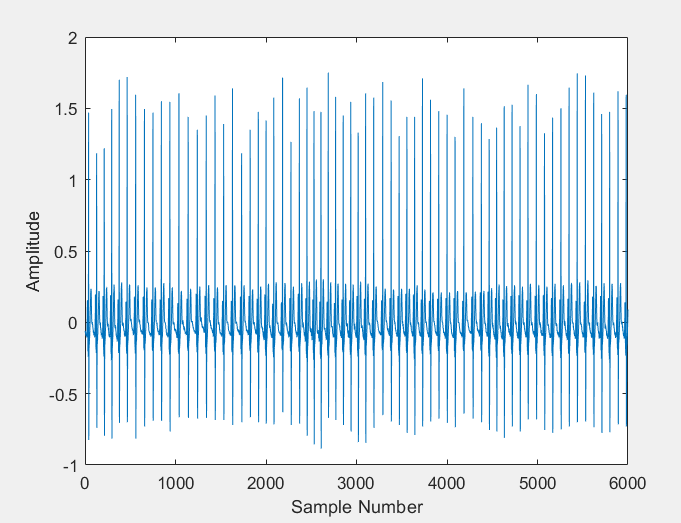

In [ ]:
len_ecg = length(ecg_sig);
save('ecg_data.mat', 'ecg_sig', 'len_ecg');
clear all; %clear all variables from the workspace.
whos %show that there are no variables
load('ecg_data.mat') % load the variables back in
whos % show that the variables have been reloaded

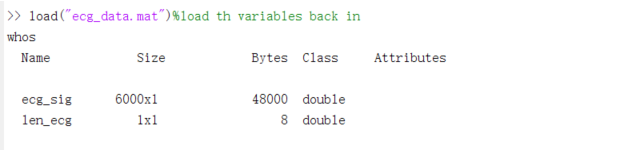

In [ ]:
[sound_sig fs] = audioread('drums.wav'); % fs is the frequency of simple
sound(sound, fs); % play the audio
image_signal = imread('Winter.jpg');
image(image_signal);

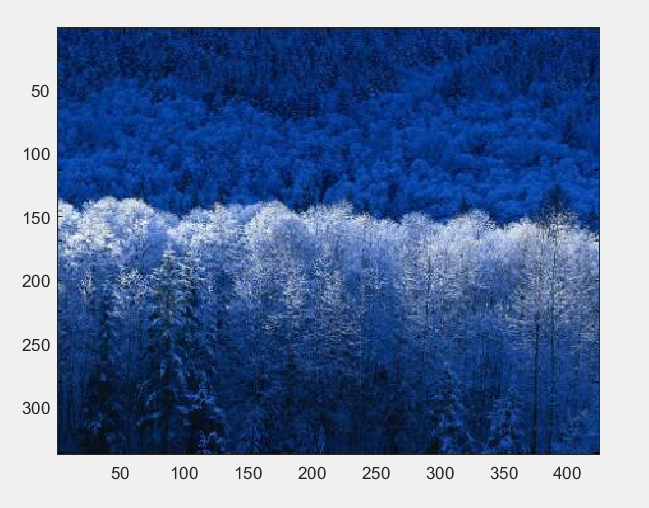

## writing data in files

In [ ]:
fid = fopen("text.txt", "w"); % open for overwriting
a = 5;
fprintf(fid, " the value of the variable a is %d", a);
fprintf(fid,"\n\tBye Bye!!"); % \n for new line and \t for tab
fclose(fid);

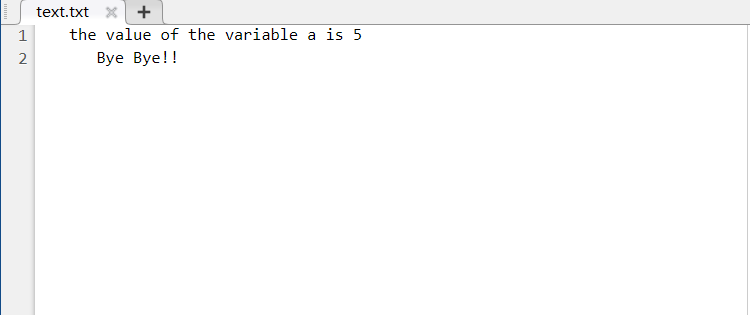

In [ ]:
file_id = fopen("text.txt","a"); % open for appending
b = 22.233;
fprintf(file_id, "The value of the variable a is %2.8f", b);
fprintf(file_id, '\n\n variable a is still a value of %2.2f \n\n Bye again!', a);
% put a new
fclose(file_id);

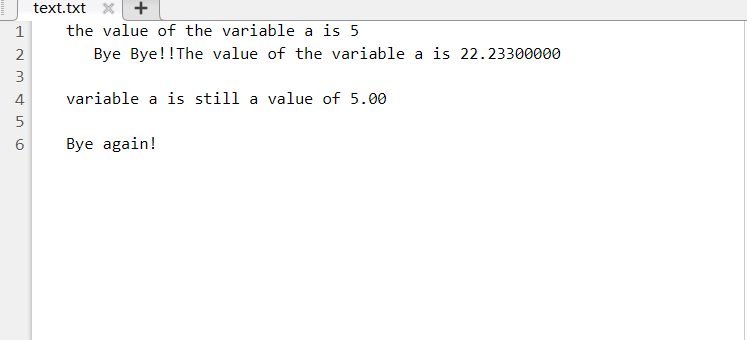

writing vector to a file

In [ ]:
fid = fopen("vector_data.txt","w");
vec = rand(1,1000);
fprintf(fid, "%2.4f\n",vec);
fclose(fid);

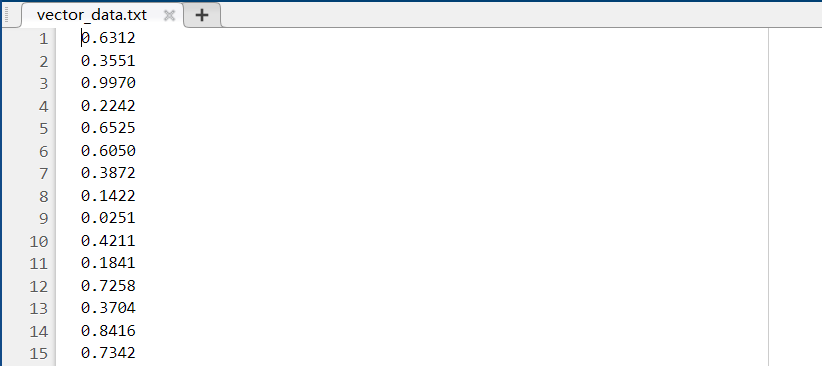

## colon Operator

In [ ]:
X = 0:7

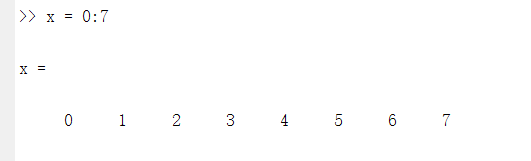

In [ ]:
X = 0:1:7

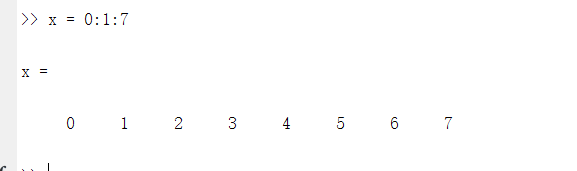

In [ ]:
X = 1:0.25:2

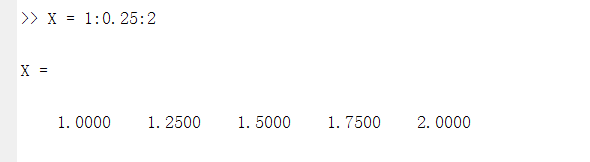

In [ ]:
X = 100 : -0.33 : 99

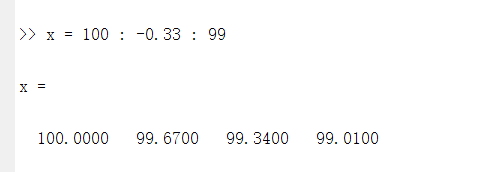

## Segment Selection

In [ ]:
X = [12 34 4 5 6 78 8 9 2];
seg = X(3:5)

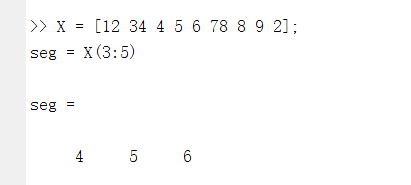

In [ ]:
X = [12 34 4 5 6 78 8 9 2];
seg = X(3:end)

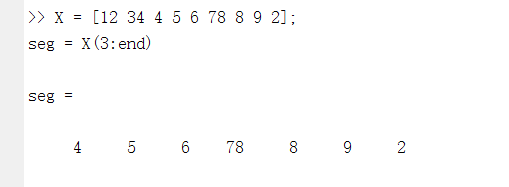

Signal generation and segement selection

In [ ]:
T = 0.01 ;%samling period
n = 0:300; % sample number
frequency =2; % frequency of a sinusoid in hertz
X = cos(2*pi*frequency*n*T); % create three seconds of a cosine sinusoid;
Xmags =abs(fft(X)); % get the magnitudes of the Discrete Fourier Transform
first_half_Xmags =Xmags(1:round(length(Xmags)/2));
plot(first_half_Xmags)

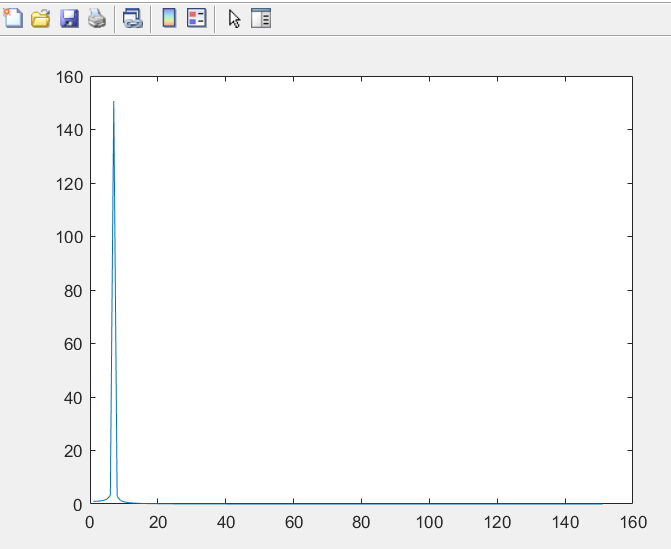

## Creating/Synthesing Signals

Synthesis Using a Mathematical Expression

\begin{equation}
x(t)=e^{-\pi t}+5 \sqrt[2]{\cos (t)}
\end{equation}

In [ ]:
T = 0.0001;% sampling period in seconds
n = 0 : 10000;%n is the sample number
x = exp(-pi*n*T) + 5*sqrt(cos(n*T));
t = n*T;
plot(t,x)
xlabel("Time (seconds)");
ylabel("Amplitude");

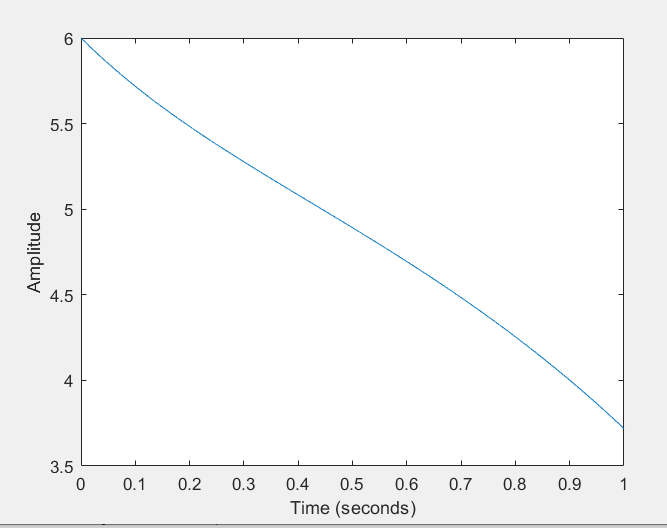

\begin{equation}
x(t)=4 \cos (\omega t+\phi) \text { where } \phi=0.4 \text { and } \omega=3
\end{equation}

In [ ]:
T = 0.001;
n = 0:2000;
omega = 3;
x = cos(omega*n*T+ 0.4);
t = n*T
plot(t,x)
xlabel('Time (seconds)');
ylabel('Amplitude');

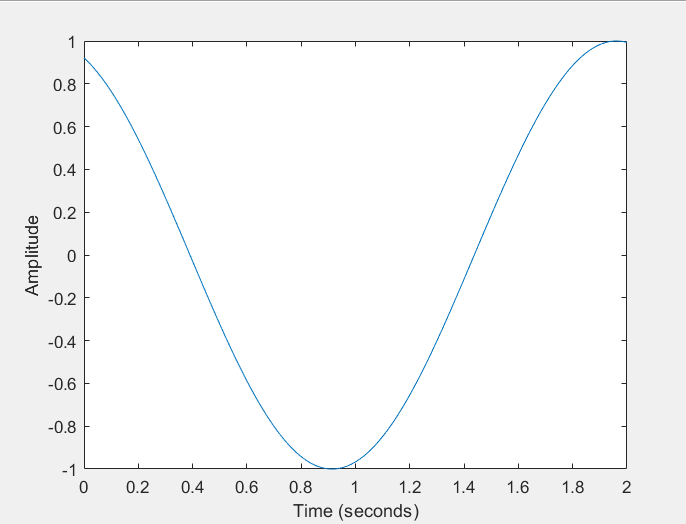

Summing and Concatenating Signals

In [ ]:
x = [3 4 5 6 7];
y = [5 6 7 11 12];
w = x + y

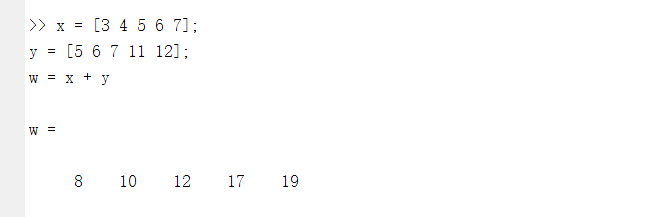

concatenating

In [ ]:
x = [3;2;6];
y =[1;9];
w = [x;y]

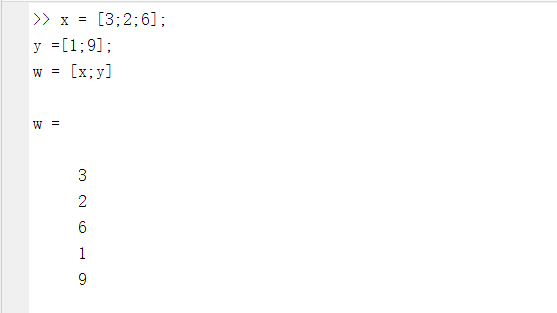

## Creating an arbitrary periodic signal

In [ ]:
repeating_segment = [zeros(1,100) ones(1,100)];
num_periods = 10;
square_waveform = []; %empty variable
for k =1 :num_periods
    square_waveform = [square_waveform repeating_segment];
end
plot(square_waveform);
ylim([-0.1 1.1])

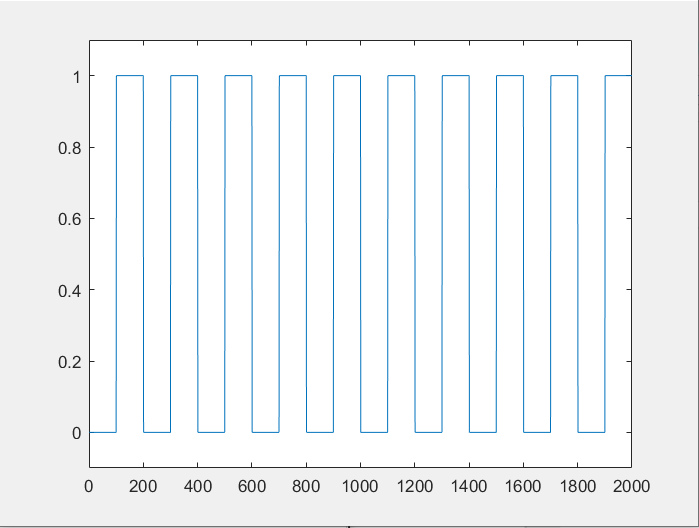

triangular waveform

In [ ]:
repeating_segment =[0:5 4:-1:1];
num_periods = 10;
triangular_waveform = [];
for k = 1: num_periods
    triangular_waveform = [triangular_waveform repeating_segment];
end
plot(triangular_waveform);

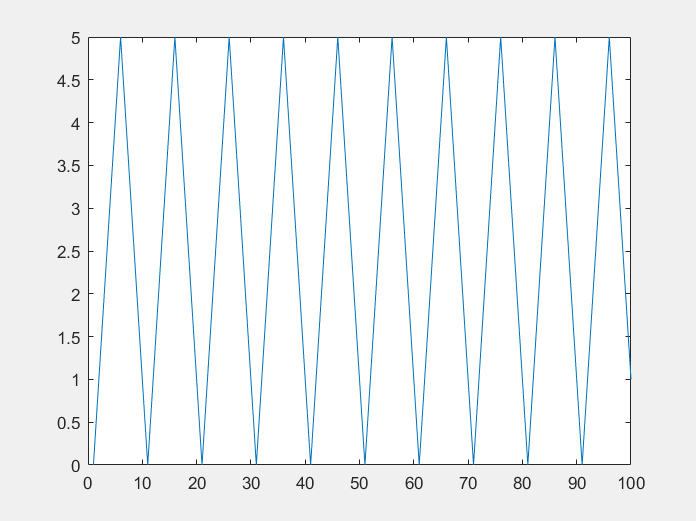

# Frequency analysing

In [ ]:
fs = 44100; % the signal is known to have been recorded at this rate
[bass_guitar fs]= audioread("bass.wav", [1,5* fs]); %read in first 5 sec fs = 44100Hz
ft = fft(bass_guitar);
mag_ft = abs(ft);
first_half_mags =mag_ft(1:round(length(mag_ft)/2));
plot(first_half_mags) % plot magnitudes versus frequency bins
ylabel('Magnitude/Amplitude')
xlabel('Bin Number')

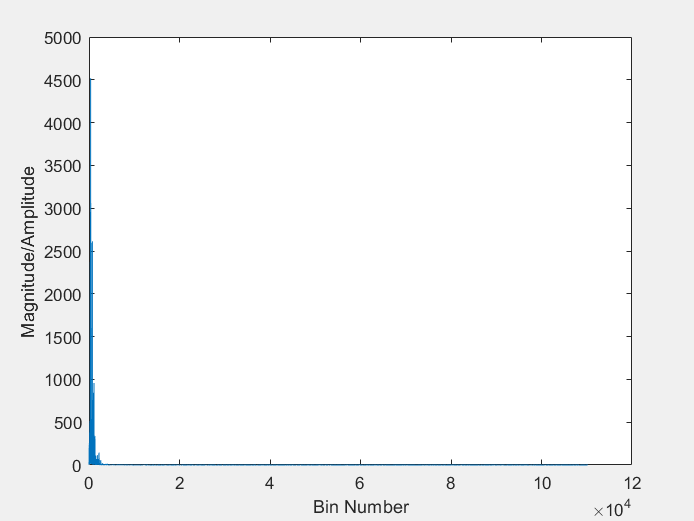

In [ ]:
low_freq_mags = mag_ft(1:2000); %the magnitudes of the low freq content are stored in a new variable%Note: 2000 in the above command corresponds to 2000/length(mag_ft)*fs = 400Hz
plot(low_freq_mags);
ylabel('Magnitude/Amplitude')
xlabel('Bin Number')

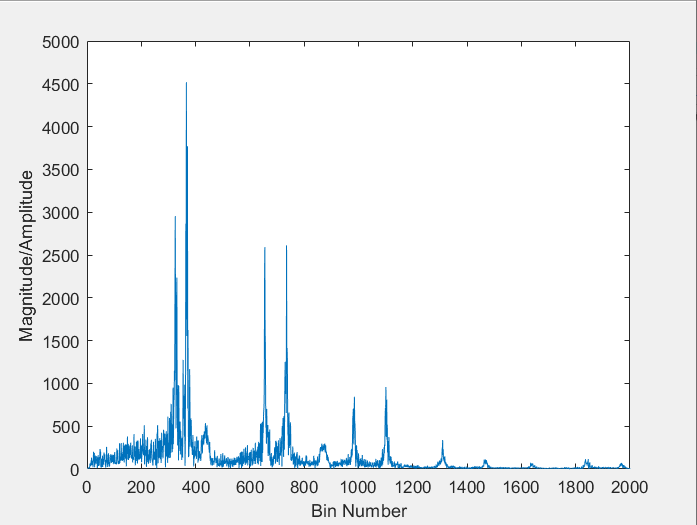

Oftentimes its useful to show the actual frequencies rather than bin numbers on the x axis. After taking
the fft of a signal each frequency bin is separated by fs/(N-1) Hz where fs is the sampling frequency (Hz)
and N is the number of frequency bins i.e. length(mag_ft) in the example above.

In [ ]:
N = length(mag_ft);
freq_scale = 0: fs/(N-1): fs;
plot(freq_scale, mag_ft);
ylabel('Magnitude/Amplitude')
xlabel('Frequency (Hz)')

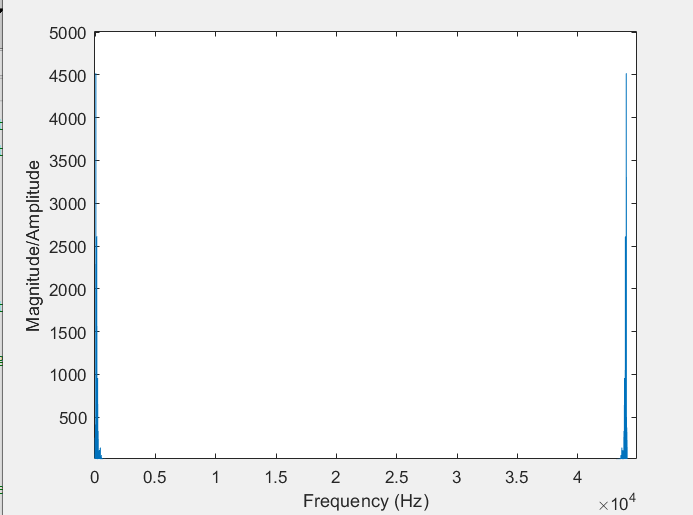

In [ ]:
low_mag_freq_scale = freq_scale(1:length(low_freq_mags));% sort index
plot(low_mag_freq_scale, low_freq_mags);
ylabel('Magnitude/Amplitude')
xlabel('Frequency (Hz)')

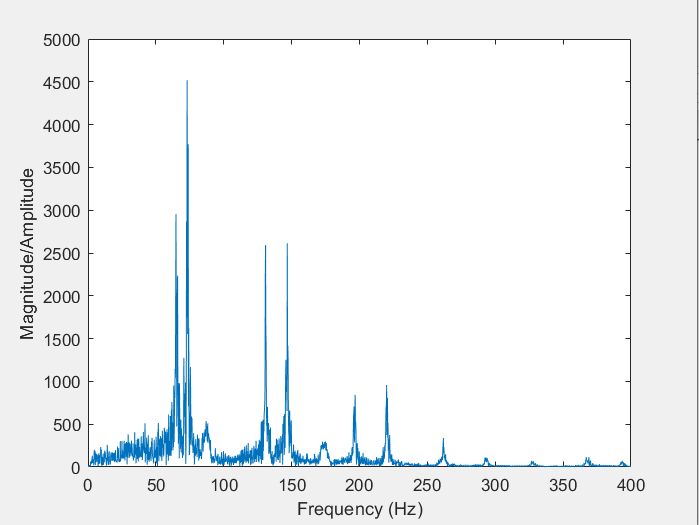

In [ ]:
plot(bass_guitar);
ylabel('Amplitude')
xlabel('Sample Number')

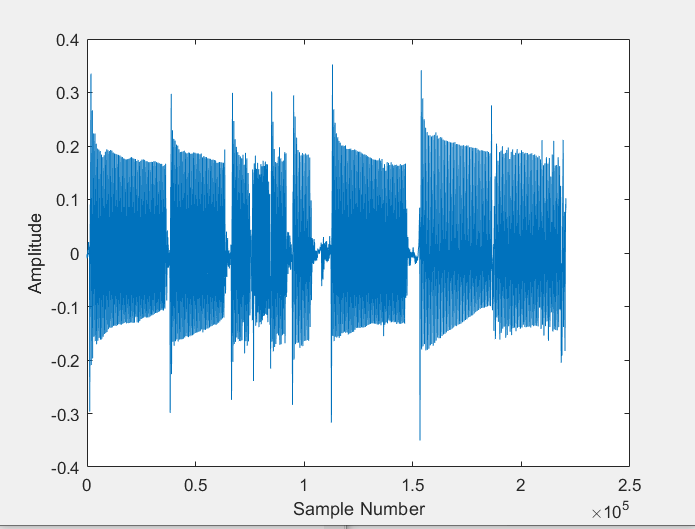

In [ ]:
first_note = bass_guitar(1:38000); %exrtact the first note from the signal
ft_first_note = fft(first_note);
mags = abs(ft_first_note);
freq_scale = 0: fs/(length(mags) -1 ): fs

determine the bin corresponding to 400Hz. Just display those frequency bins. The plot shows the
fundamental at 73Hz with two strong harmonics at 146Hz and 219Hz

In [ ]:
low_freq_bin_range = length(mags)*(400/44100);
low_freq_mags = mags(1:low_freq_bin_range);
low_freq_scale = freq_scale(1: low_freq_bin_range);
plot(low_freq_scale, low_freq_mags)
ylabel('Magnitude/Amplitude')
xlabel('Frequency (Hz)')

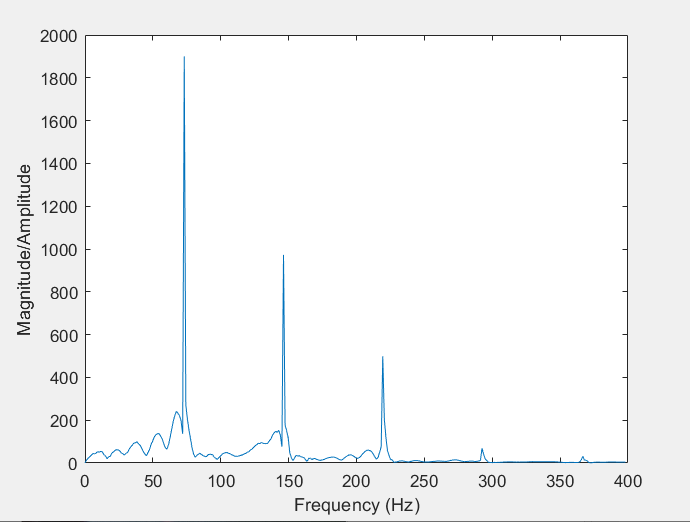

## Filtering Signals / Determining the Output of a System

Using the filter function

Once the b and a coefficients of a system are availbale it is a trivial excercise to determine the output of
a system to any input. Here is an example for a system described by the following difference equation:  
y[n] = 0.3x[n] + 1.5x[n-1] + 0.6y[n-1]  
the b coefficients of this system are 0.3 and 1.5; the a coefficients are 1 and -0.6.

In [ ]:
x = [2  4 5 6 7 1 23];% an example signal
b = [0.3 1.5];
a = [1 -0.6];
y = filter(b,a,x);

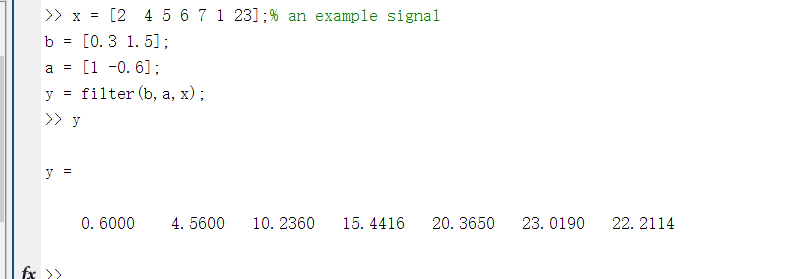

Using conv function

Convolution is a mathematical process in which the output of a system can be determined if you have
the systems impulse response:   y = conv(x,h);

In [ ]:
[church_impulse fs] = audioread('church.wav'); % read in a previously recorded impulse response of a church 
[bass_guitar fs]= audioread("bass.wav");
drum_in_church = conv(bass_guitar, church_impulse);
sound(drum_in_church, fs); 

In this second example it'll be shown that convolution produces the same output as the filter function
above. To do this the impulse response of the above system will first be determined using the impz
fucntion.


In [ ]:
x = [ 2 4 5 23 1 34 5] ; % an example signal
b = [0.3 1.5];
a = [1 -0.6];
h = impz(b,a); % calculate the impulse response
y2 = conv(x,h);
% compare y2 with y above. They should be the same.

In [ ]:
x = [ 2 4 5 23 1 34 5] ; % an example signal
b = [0.3 1.5];
a = [1 -0.6];
h = filter(b,a, [ 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]); %determine the impulse response -
% alternatively use |impz| to calculate h

num_bins = length(x) + length(h);
H = fft(h, num_bins);
X = fft(x, num_bins);
Y = X.*H % Element-wise multiplication
Y3 = ifft(Y);
Y3 = real(Y3);
% usually there will be some very small imaginary terms in the y value - these are ba% introduced due to rounding errors and should be ignored.
%
% compare y3 with y and y2 above. They should be the same.

## Determing a systems frequency response

Three ways will be shown to determine a systems frequency response. The most straighforward way is
using the freqz function. The two other ways shown here are based on signal processing theory; they
are the impulse response method and the method of evaluating the systems transfer function 'around
the unit circle' (rarely used, but important theory for designing filters)

y[n] = x[n] + 2x[n-1] + y[n-1] - 0.3y[n-2]


In [ ]:
b = [1 2];
a = [1 -1 0.3];
H = freqz(b,a);
plot(abs(H)); % show magnitude response against bin number
plot(angle(H)); % show phase response against bin number

In [ ]:
[H, w] = freqz(b,a);
plot(w, abs(H)); % show magnitude response against normalised frequency
plot(w, angle(H));% show phase response against normalised frequency


Using the systems impulse response to determine a systems frequency response


In [ ]:
[church_impulse fs] = audioread('church.wav'); % church impulse response
H = fft(church_impulse);
N = length(church_impulse);
freq_scale = 0 : fs/(N-1) : fs;
plot(freq_scale, abs(H)); % show magnitude response against normalised frequency

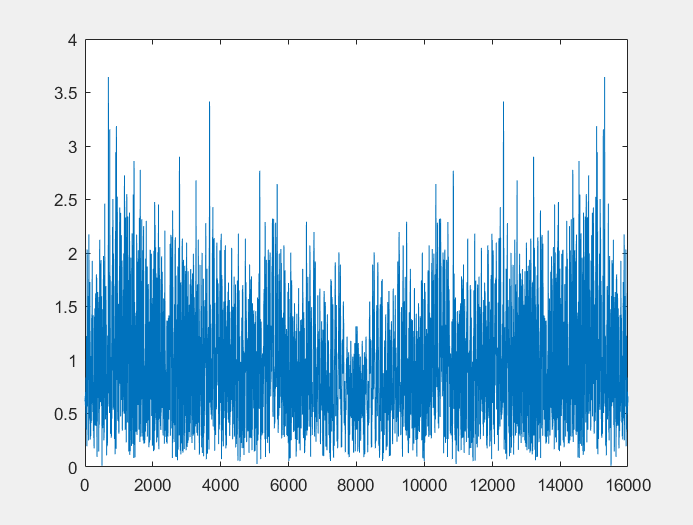

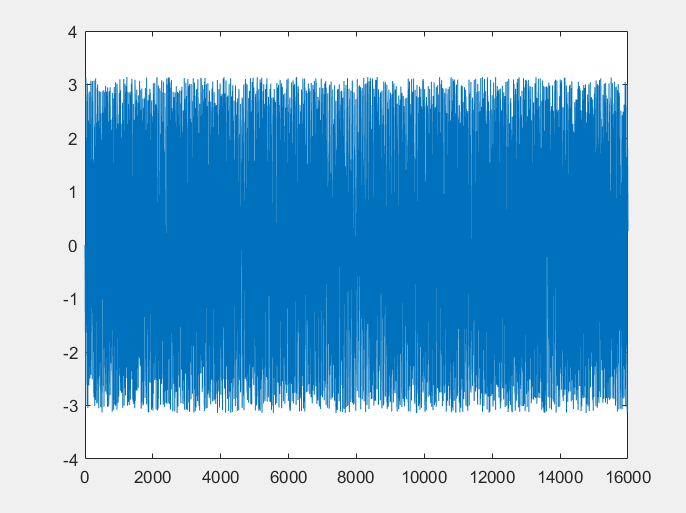

Evaluate H(z) at 'unit circle' to determine a systems frequency response

\begin{equation}
H(z)=\frac{z+2}{z^2-z+0.3}
\end{equation}

The following evaluates this expression for 200 points around the unit circle i.e. theta is varied from 0 to
pi in steps of pi/(200-1);

In [ ]:
theta = 0 : pi/(200-1) : pi;
z = exp(j*theta);
H =(z+2)./(z.^2 -z +0.3);
b = [1 2]
a = [1 -1 0.3];
H2 = freqz(b,a,200);%200-point frequency response
plot(abs(H));
hold on
plot(abs(H2), 'rx')
hold off


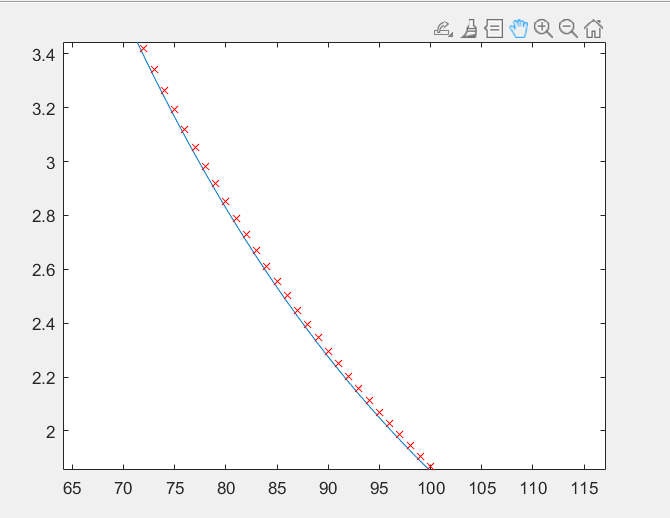

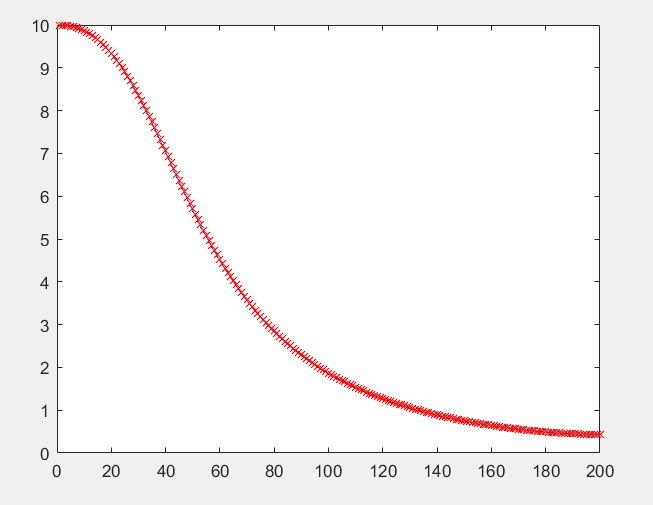

## Designing Filter

In [ ]:
[b_fir1] = fir1(3, 0.3);
[b_butter, a_butter] = butter(3, 0.2);
[b_cheby, a_cheby] = cheby1(3, 0.1, 0.2); % 0.1 paramter specfies passband ripple
[b_ellip, a_ellip] = ellip(3,0.5, 100, 0.2); % 100 parameter specifies stopband ripple

H_fir1 = freqz(b_fir1, 1, 200);
H_butter = freqz(b_butter, a_butter, 200);
H_cheby = freqz(b_cheby, a_cheby, 200);
H_ellip = freqz(b_ellip, a_ellip,200);
plot(abs(H_fir1),'k')
hold on
plot(abs(H_butter), 'b')
plot(abs(H_cheby), 'r');
plot(abs(H_ellip), 'g');
xlabel('Frequency bins');
ylabel('Magnitude');
legend('fir1','butter', 'cheby', 'ellip')
hold off


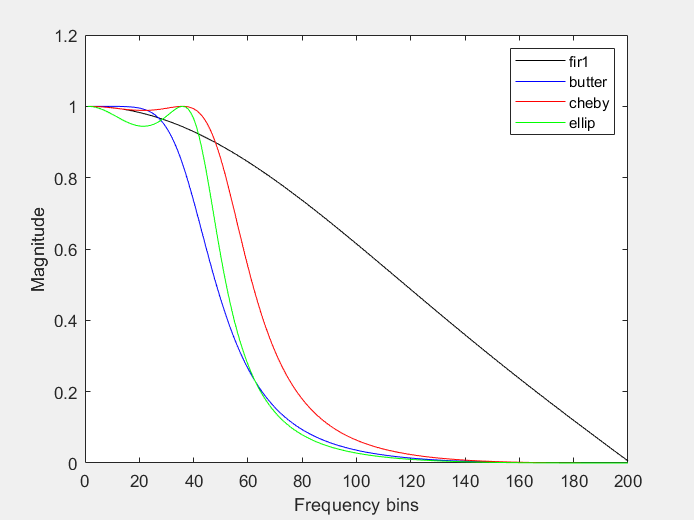

In [ ]:
[b_fir1] = fir1(3, 0.3);
[b_butter, a_butter] = butter(3, 0.2);
[b_cheby, a_cheby] = cheby1(3, 10, 0.2); 
[b_ellip, a_ellip] = ellip(3,0.5, 1, 0.2); 

H_fir1 = freqz(b_fir1, 1, 200);
H_butter = freqz(b_butter, a_butter, 200);
H_cheby = freqz(b_cheby, a_cheby, 200);
H_ellip = freqz(b_ellip, a_ellip,200);
plot(abs(H_fir1),'k')
hold on
plot(abs(H_butter), 'b')
plot(abs(H_cheby), 'r');
plot(abs(H_ellip), 'g');
xlabel('Frequency bins');
ylabel('Magnitude');
legend('fir1','butter', 'cheby', 'ellip')
hold off

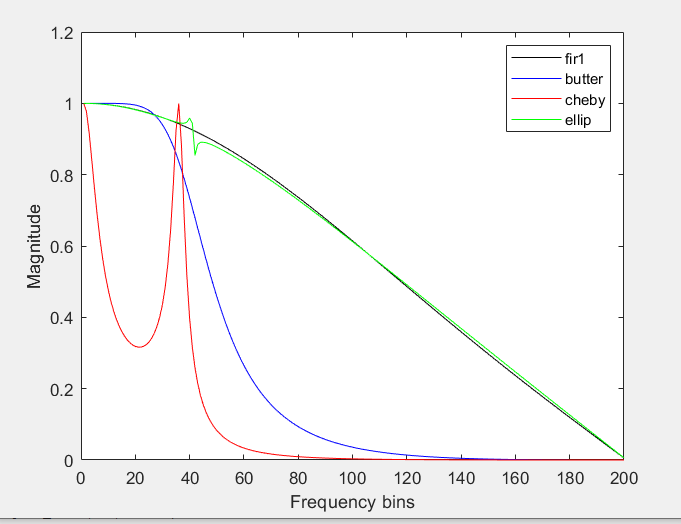

In [ ]:
[b_butter, a_butter] = butter(3, [0.2 0.5]);
[b_cheby, a_cheby] = cheby1(3, 0.5, [0.2 0.5]); % 0.5 paramter specfies passband ripple
[b_ellip, a_ellip] = ellip(3,0.5, 20, [0.2 0.5]); % 20 parameter specifies stopband ripple
H_butter = freqz(b_butter, a_butter, 200);
H_cheby = freqz(b_cheby, a_cheby, 200);
H_ellip = freqz(b_ellip, a_ellip,200);
plot(abs(H_butter))
hold on
plot(abs(H_cheby), 'r');
plot(abs(H_ellip), 'g');
xlabel('Frequency bins');
ylabel('Magnitude');
legend('butter', 'cheby', 'ellip')
hold off


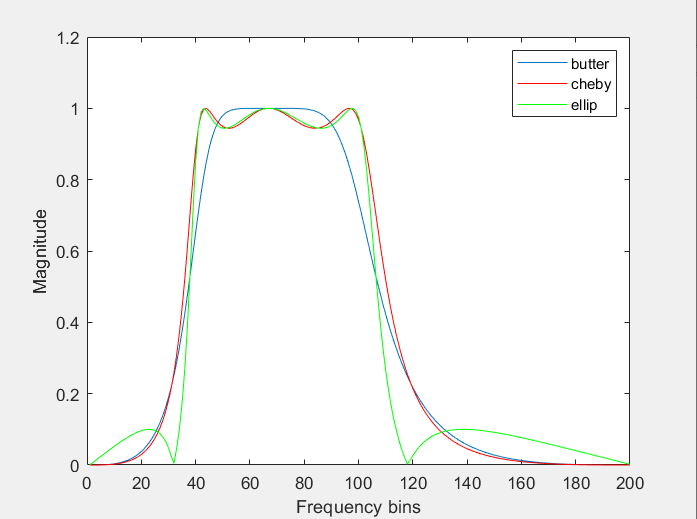

In [ ]:
[b_butter, a_butter] = butter(6, [0.2 0.5]);
[b_cheby, a_cheby] = cheby1(6, 0.5, [0.2 0.5]); % 0.5 paramter specfies passband ripple
[b_ellip, a_ellip] = ellip(6 ,0.5, 20, [0.2 0.5]); % 20 parameter specifies stopband ripple
H_butter = freqz(b_butter, a_butter, 200);
H_cheby = freqz(b_cheby, a_cheby, 200);
H_ellip = freqz(b_ellip, a_ellip,200);
plot(abs(H_butter))
hold on
plot(abs(H_cheby), 'r');
plot(abs(H_ellip), 'g');
xlabel('Frequency bins');
ylabel('Magnitude');
legend('butter', 'cheby', 'ellip')
hold off

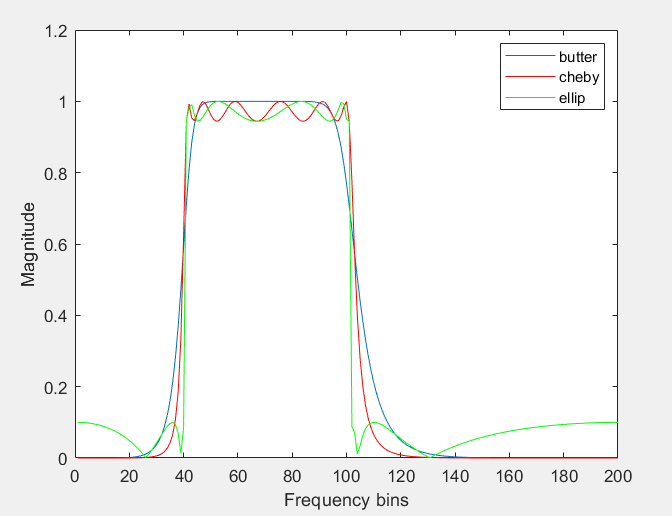